In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [61]:
df=pd.read_csv("weather.csv")
df=df.dropna()
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0


In [62]:
X=df[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']]
X=X.values

In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

In [64]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)


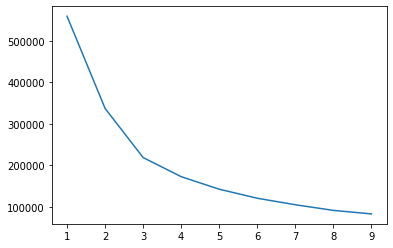

In [65]:
rng=range(1,10)
sse= []
for i in rng:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(rng,sse)

In [66]:
kmeans=KMeans(n_clusters=3)
ypred=kmeans.fit_predict(X_pca)


<function matplotlib.pyplot.show(close=None, block=None)>

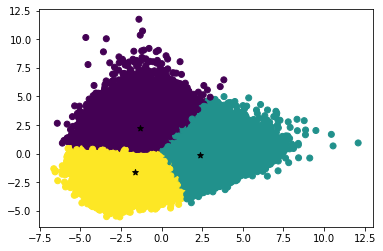

In [69]:



plt.scatter(X_pca[:,0],X_pca[:,1],c=ypred)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black',marker='*')
plt.show